# MTH9879 Homework 8

#### Name: ShengQuan Zhou

Assigned: April 4, 2017.
Due: May 2, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 
Read Section 6.7 of Bouchaud, Farmer and Lillo.

## Predictability of order flow

### 1. (6 points)

Suppose that the distribution of meta order sizes $Q$ is exponential so that

$$
\Pr(Q>V)= \frac{1}{\lambda}\,e^{-\lambda\,V}
$$

Assuming slices of  constant size $\bar v$, compute the conditional probability that a hidden order has more slices given that $n$ slices have already been observed.  Compare your result with the case where distribution of metaorder size is power-law.

#### Solution:

The conditional probability that a hidden order has more slices, each with constant size $\bar{v}$, given that $n$ slices have already been observed is
\begin{align}
\text{Pr}\left[Q \ge (n+1)\bar{v}\middle| Q \ge n\bar{v}\right] &=  \frac{\text{Pr}\left[Q \ge (n+1)\bar{v},  Q \ge n\bar{v}\right]}{\text{Pr}\left[ Q \ge n\bar{v}\right]} \\
&=  \frac{\text{Pr}\left[Q \ge (n+1)\bar{v}\right]}{\text{Pr}\left[ Q \ge n\bar{v}\right]} \\
&= \frac{e^{-\lambda(n+1)\bar{v}}}{e^{-\lambda n\bar{v}}} \\
&= e^{-\lambda \bar{v}},
\end{align}
which is independent of $n$. In other words, if the order-size distribution is exponential, the likelihood that a metaorder is to continue is independent of how long it has been active.

If the distribution of metaorder size is power-law
\begin{align}
\text{Pr}\left[Q \ge (n+1)\bar{v}\middle| Q \ge n\bar{v}\right] &=  \frac{\text{Pr}\left[Q \ge (n+1)\bar{v}\right]}{\text{Pr}\left[ Q \ge n\bar{v}\right]} \\
&= \frac{n^\beta}{(n+1)^\beta} \\
&= \left(\frac{n}{n+1}\right)^\beta,
\end{align}
which increases with $n$. In other words, if the order-size distribution is power-law, the longer a metaorder has been active, the more likely it is to continue.

## Price manipulation

### 2. (10 points)

Consider the price process

$$
S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s
$$

where ${\dot x}_s$ is the rate of trading in dollars at time $s < t$, $f(\dot{x}_s)$ represents the impact of trading at time $s$ and $G(t-s)$ is a decay factor.

(a) With the choices

$$
f(v)=\sqrt{v},\quad G(\tau)=\frac{1}{1+\tau},
$$
    
repeat the computations in Lecture 8  to derive an expression for the expected cost of accumulating shares at the rate $v_1$ and liquidating them at the rate $v_2$.

(b) Verify that with $T=1$, $v_1=1/4$, $v_2=1$, the expected cost of this round-trip strategy is negative, thus demonstrating that price manipulation is possible. (Recall from the lecture slides that price manipulation is always possible if $f(\cdot)$ is nonlinear and the decay kernel $G(\cdot)$  is finite at the origin.)

Hint: You might consider using Mathematica or Wolfram Alpha to do the integrations.

#### Solution (a):

According to Lecture 8, the cost of a strategy where shares are accumulated at rate $v_1$ and then liquidated at rate $v_2$ can be expressed in terms of $C[\Pi] = C_{11} + C_{22} - C_{12}$, where
\begin{align}
C _ {11} &= v_1f(v_1) \int _ {0}^{\theta T} dt \int _ {0}^t G(t-s)ds, \\
C _ {22} &= v_2f(v_2) \int _ {\theta T}^{T} dt \int _ {\theta T}^t G(t-s)ds, \\
C _ {12} &= v_2f(v_1) \int _ {\theta T}^{T} dt \int _ {0}^{\theta T} G(t-s)ds,
\end{align}
where $\theta = \frac{v_2}{v_1 + v_2}$.

Carry out the computation,
\begin{align}
C _ {11} &= v_1^{\frac{3}{2}}\int _ {0}^{\theta T} dt \int_0^t \frac{1}{1+t-s}ds \\
&= v_1^{\frac{3}{2}}\int _ {0}^{\theta T} dt \ln(1+t-s)\big| _ {t}^0\\
&= v_1^{\frac{3}{2}}\int _ {0}^{\theta T} dt \ln(1+t) \\
&= v_1^{\frac{3}{2}} \left[ (1+t)\ln(1+t)-(1+t) \right]\big| _ {0}^{\theta T}\\
&= v_1^{\frac{3}{2}} \left[ (1+\theta T)\ln(1+\theta T)-\theta T \right];\\
C _ {22} &= v_2^{\frac{3}{2}} \int _ {\theta T}^T dt \int _ {\theta T}^t \frac{1}{1+t-s}ds \\
&= v_2^{\frac{3}{2}} \int _ {\theta T}^T dt \ln(1+t-s)\big| _ {t}^{\theta T} \\
&= v_2^{\frac{3}{2}} \int _ {\theta T}^T dt \ln(1+t-\theta T)\\
&= v_2^{\frac{3}{2}} \left[ (1+t-\theta T)\ln(1+t-\theta T) - (1+t-\theta T) \right]\big| _ {\theta T} ^T \\
&= v_2^{\frac{3}{2}} \left[ (1+(1-\theta) T)\ln(1+(1-\theta) T) - (1-\theta) T\right];\\
C _ {12} &= v_2 \sqrt{v_1} \int _ {\theta T}^T dt \int _ {0}^{\theta T} \frac{1}{1+t-s}ds \\
&= v_2 \sqrt{v_1} \int _ {\theta T}^T dt \ln(1+t-s)\big| ^ {0} _ {\theta T} \\
&= v_2 \sqrt{v_1} \int _ {\theta T}^T dt \left[ \ln(1+t) - \ln(1+t-\theta T) \right]  \\
&= v_2 \sqrt{v_1}  \left[ (1+t)\ln(1+t)-(1+t) - (1+t-\theta T)\ln(1+t-\theta T)+(1+t-\theta T) \right]\big| _ {\theta T}^T  \\
&= v_2 \sqrt{v_1}  \left[ (1+T)\ln(1+T) - (1+(1-\theta) T)\ln(1+(1-\theta) T)
- (1+\theta T)\ln(1+\theta T)
\right].
\end{align}
Combined,
$$
C[\Pi] = C_{11} + C_{22} - C_{12}.
$$

#### Solution (b):

Let $T=1$, $v_1=1/4$, $v_2=1$, thus $\theta = \frac{1}{1+1/4} = \frac{4}{5}$, $\theta T = \frac{4}{5}$, $(1-\theta)T = \frac{1}{5}$, $1+\theta T = \frac{9}{5}$, $1+(1-\theta)T = \frac{6}{5}$.
\begin{align}
C _ {11} &= \frac{1}{8} \left( \frac{9}{5}\ln\frac{9}{5}-\frac{4}{5} \right)\approx 0.0322520;\\
C _ {22} &= \left( \frac{6}{5}\ln\frac{6}{5} - \frac{1}{5}\right)\approx 0.0187859;\\
C _ {12} &= \frac{1}{2}  \left( 2\ln 2 - \frac{6}{5}\ln\frac{6}{5} - \frac{9}{5}\ln\frac{9}{5}\right)\approx 0.0547462;\\
C[\Pi] &\approx -0.0037 < 0.
\end{align}

## The Obizhaeva-Wang model

### 3. (8 points)

In the Obizhaeva Wang (OW) model, the price follows

$$
S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s
$$

(a) Derive an expression for the expected price path corresponding to a VWAP execution.

(b) With the duration $T$ of the meta order set to 1, plot the expected price path from time $t=0$ to time $t=2$ for $\rho=0.5,1,$ and $2$.

(c) What is the expected average cost per share $\bar S_T$ of a VWAP order in the OW model?

#### Solution (a):

For a VWAP execution, denotes the total number of shares to execute by $N$,
$$
\dot{x}_s = \begin{cases}
\frac{N}{T}, &\quad s\le T,\\
0, &\quad s>T.
\end{cases}
$$
Because $\int_0^t \sigma dZ_s$ is a martingale, $\mathbb{E}\left[\int_0^t \sigma dZ_s\right] = 0$. Thus, if $t>T$,
\begin{align}
\mathbb{E}[S_t] &= S_0+\eta \int_0^t{\dot x} _ s e ^ {-\rho (t-s)}ds\\
 &= S_0+\eta \frac{N}{T}\int_0^T e ^ {-\rho (t-s)}ds \\
 &= S_0+\eta \frac{N}{T} e^{-\rho t}\frac{1}{\rho} e^{\rho s}\big|^T_0\\
 &= S_0+\eta \frac{N}{T} e^{-\rho t}\frac{e^{\rho T} - 1}{\rho}  \\
 &= S_0+\eta N \frac{e^{\rho (T-t)} - e^{-\rho t}}{\rho T}.
\end{align}
If $t\le T$,
\begin{align}
\mathbb{E}[S_t] &= S_0+\eta \int_0^t{\dot x} _ s e ^ {-\rho (t-s)}ds\\
 &= S_0+\eta \frac{N}{T}\int_0^t e ^ {-\rho (t-s)}ds \\
 &= S_0+\eta \frac{N}{T} e^{-\rho t}\frac{1}{\rho} e^{\rho s}\big|^t_0\\
 &= S_0+\eta \frac{N}{T} e^{-\rho t}\frac{e^{\rho t} - 1}{\rho}  \\
 &= S_0+\eta N \frac{1 - e^{-\rho t}}{\rho T}.
\end{align}
In summary,
$$
\mathbb{E}[S_t] = \begin{cases}
S_0+\eta N \frac{1 - e^{-\rho t}}{\rho T}, &\quad t\le T,\\
S_0+\eta N \frac{e^{\rho (T-t)} - e^{-\rho t}}{\rho T}, &\quad t>T.
\end{cases}
$$

#### Solution (b):

Let $T=1$,
$$
\frac{\mathbb{E}[S_t] - S_0}{N\eta}= \begin{cases}
  \frac{1 - e^{-\rho t}}{\rho }, &\quad t\le 1,\\
  \frac{e^{\rho (1-t)} - e^{-\rho t}}{\rho }, &\quad t>1.
\end{cases}
$$

In [15]:
ts = seq(0,2,0.001)

In [33]:
expected_price_path = function(t, rho)
{
    if (t<=1)
    {
        return ((1-exp(-rho*t))/rho);
    }
    else
    {
        return ((exp(rho*(1-t))-exp(-rho*t))/rho);
    }
}

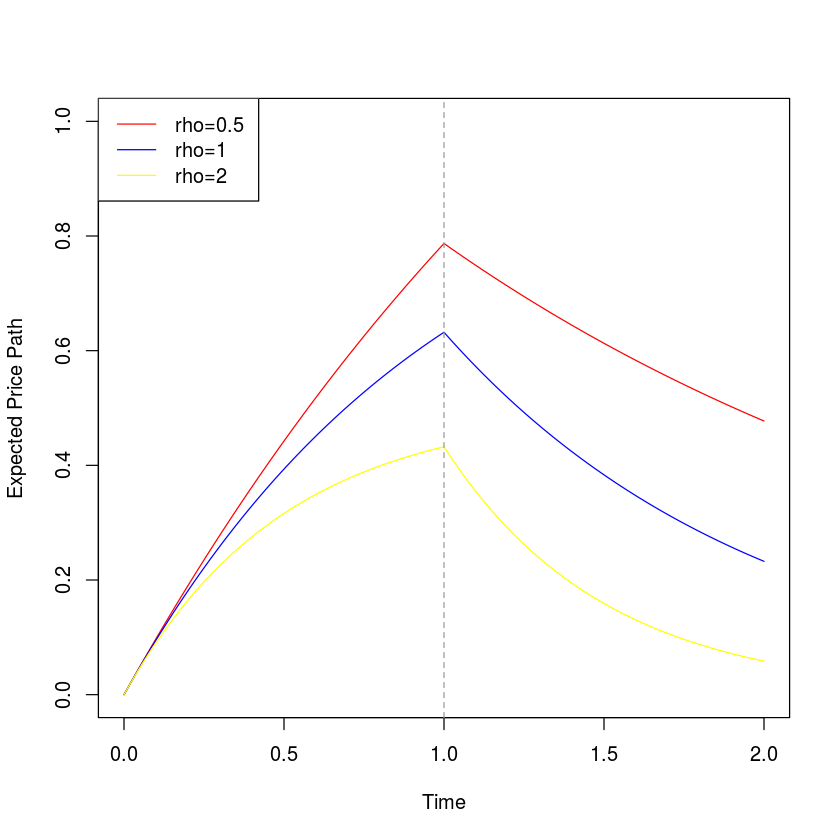

In [39]:
S_1 = sapply(ts, function(t) {expected_price_path(t, 0.5)})
S_2 = sapply(ts, function(t) {expected_price_path(t, 1.0)})
S_3 = sapply(ts, function(t) {expected_price_path(t, 2.0)})

plot(ts, S_1, type='l', xlab='Time', ylab='Expected Price Path', col='red', ylim=c(0, 1))
points(ts, S_2, type='l', col='blue')
points(ts, S_3, type='l', col='yellow')
abline(v=1, col = "gray60",lty=2) # completion at T=1
legend("topleft", c("rho=0.5","rho=1","rho=2"),col=c("red","blue","yellow"),lty =1)

#### Solution (c):

The expected average cost per share
$$
\bar{S}_T = \frac{C[\Pi]}{N},
$$
where
\begin{align}
C[\Pi] &= \mathbb{E}\left[ \int_0^T \dot{x} _ t (S_t-S_0)dt \right]\\
&= \eta\mathbb{E}\left[ \int_0^T dt \dot{x} _ t \int _ 0^t{\dot x} _ s e ^ {-\rho (t-s)}ds \right] + \sigma\mathbb{E}\left[ \int_0^T dt \dot{x} _ t \int _ 0^t  dZ _ s \right] \\
(\text{Note: } t\le T) &= \eta\frac{N^2}{T^2}\int_0^T dt  \int _ 0^t e ^ {-\rho (t-s)}ds +  \sigma \int_0^T dt \dot{x} _ t \underbrace{\mathbb{E}\left[\int _ 0^t  dZ _ s \right]} _ {=0} \\
&= \eta\frac{N^2}{\rho T} - \eta \frac{N^2}{\rho^2 T^2}\left(1 - e^{-\rho T}\right) \\
&= \eta \frac{N^2}{\rho T}\left( 1- \frac{1 - e^{-\rho T}}{\rho T } \right).
\end{align}
Thus,
$$
\bar{S}_T = \eta \frac{N}{\rho T}\left( 1- \frac{1 - e^{-\rho T}}{\rho T } \right).
$$